# 타이타닉 생존자 데이터 분석 Study

이번 블로그는 캐글 초보자를 위한 유명한 데이터 분석인 Titanic: Machine Learning from Disaster에 대한 블로깅일 할 것이다.

다음의 참고자료를 통해 재구성 한 것이다.

- 캐글 타이타닉 생존자 예측 도전기 (1) : https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

### 1. 데이터 분석을 위한 문제 정의하기

-  타이타닉호의 탑승 했던 사람들의 정보를 바탕으로 생존자를 예측하는 문제이다.
- 이 데이터를 분석하기 위해 여러가지 머신러닝 스킬들을 사용할 것이다.

### 1. 데이터 불러오기


제일 먼저 필요한 라이브러리인 numpy와 pandas를 import 하고 필요한 데이터 파일을 불러오자.


In [217]:
import pandas as pd
import numpy as np

In [218]:
train = pd.read_csv('/home/jaeyoon89/kaggle_titanic_study/train.csv')
test = pd.read_csv('/home/jaeyoon89/kaggle_titanic_study/test.csv')

데이터가 제대로 불러와졌는지 확인을 위해 train.head()를 실행시키자.

In [219]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. 데이터 분석


- Survivied는 생존 여부(0은 사망, 1은 생존) -> train 데이터에서만 제공한다.
- Pclass는 사회경제적 지위(1에 가까울 수록 높다.)
- SipSp는 배우자나 형제 자매 명 수의 총 합을 나타낸다.
- Parch는 부모 자식 명 수의 총 합을 나타낸다.

각각 특성들의 의미를 알았으니, 주어진 데이터에서 대해 간략하게 살펴보자.

In [220]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

train data shape:  (891, 12)
test data shape:  (418, 11)
----------[train infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------[test infomation]----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):


이제 위에서 살펴본 특성들이 Survived 에 미치는 영향에 대해서 생각해보자.
먼저 데이터의 시각화를 위한 라이브러리를 불러오자.

In [221]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### 3.1 Pie chart 


먼저 아래와 같이 카테고리 피처의 분포를 알아보기 위해 pie chart를 만드는 함수를 정의하자.

- Sex
- Pclass
- Embarked

In [222]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + '\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '\'s ratio')
    
    plt.show()

먼저 Sex에 대한 Pie chart를 그려보자.


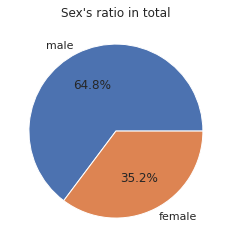

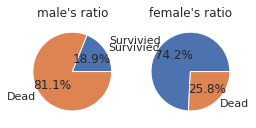

In [223]:
pie_chart('Sex')

위처럼 남성이 배에 더 많이 탔으며, 남성보다 여성의 생존율이 더 높다는 것을 알 수 있다.

다음으로 Pclass에 대해서도 그려보자.

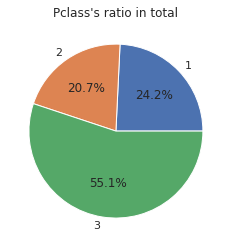

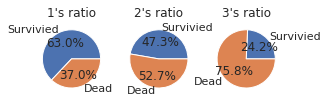

In [224]:
pie_chart('Pclass')

위처럼 탑승객들 중 3인 사람들이 가장 많이 탑승했지만 Pclass가 높은 사람들의 생존율이 더 높다는 것을 알 수 있다.

마지막으로 어느 곳에서 승선했는지를 나타내는 Embarked 에 대해서도 알아보자.

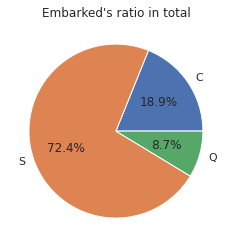

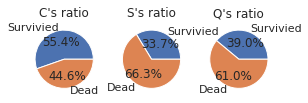

In [225]:
pie_chart('Embarked')

위와 같이 S에서 승선한 사람들이 가장 많았으며 C에서 탄 사람중에선 생존한 사람의 비율이 높았고, 나머지 두 선착장에서 탄 사람들은 생존하지 못한 사람이 더 많다.


#### 3.2 Bar chart


이번에는 아래의 피처에 대해 Bar chart를 정의해서 데이터를 시각화 해보자.

- SibSp
- Parch

In [226]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

먼저 SibSp에 대해 Bar chart를 그려보자.

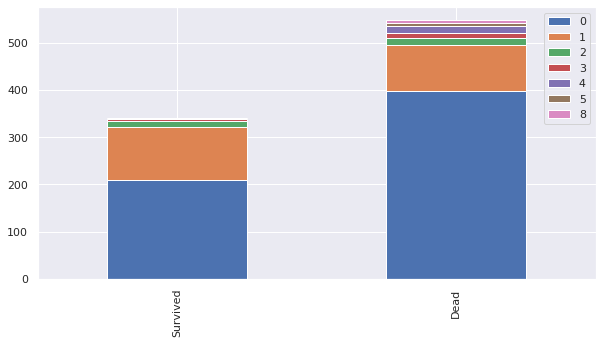

In [227]:
bar_chart("SibSp")

위 Bar chart 처럼 2명 이상의 형제나 배우자와 함께 탔을 경우 생존한 사람의 비율이 높다는 것을 알 수 있다.

이번엔 parch에 대해서도 Bar chart를 그려보자.

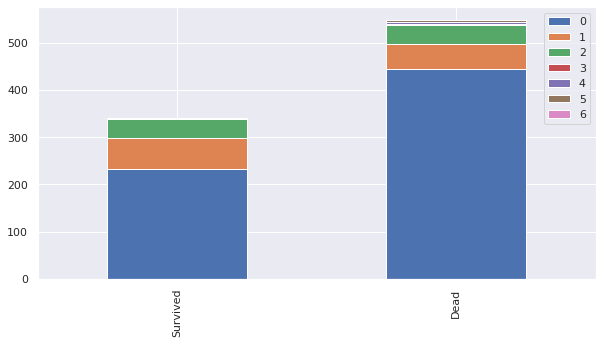

In [228]:
bar_chart("Parch")

Parch특성은 SibSp와 비슷한 결과를 보인다.

지금까지 살펴본 데이터 특성들을 보면 성별이 여성이거나 Pclass가 높을수록 그리고 C 선착장에서 배를 타고 형제, 자매, 배우자, 부모, 자녀와 함께 배를 탄 사람들의 생존율이 높았다는 것을 알 수 있다.

하지만 하나의 특성과 생존 비율 만을 생각해서 예측하기에는 아직 무언가 부족하다.

예를 들어 높은 금액의 티켓을 산 부유한 사람이 가족들이랑 왔을 경우가 많다고 가정해본다면, 가족들과 함께 왔다고 해서 살 가능성이 높다고 할 수 없다. 따라서 단일 특성을 가지고 생존 확률을 예측하기보단 여러가지 특성을 종합해서 예측을 하는 것이 더 좋을 것이다.

### 4. 데이터 전처리 및 특성 추출하기

이제 앞으로 예측할 모델에 학습을 시킬 피처들을 골라 알맞게 전처리하는 과정을 해볼 것이다.

일단 우리가 선택할 특성은 Name, Sex, Embarked, Age, SibSp, Parch, Fare, Pclass이다. 하지만 Ticket과 Cabin은 특별히 데이터분석에 필요하지 않기 때문에 제외한다.

또한 데이터 전처리를 하는 과정에서는 train과 test 데이터를 같은 방법으로 한 번에 처리를 해야하기 때문에 먼저 두 개의 데이터를 합쳐보자.

In [229]:
train_and_test = [train, test]

#### 4.1 Name


이름은 사실 중요하지 않은 특성이라 생각할 수 있다.
예측 성능에 크게 영향을 미치진 않지만 이름에서 Title을 가져오자.
데이터에 Title 이라는 새로운 열을 만들어 Title에서 추출한 Title을 넣어보자.

In [230]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


위에서 쓰인 ’ ([A-Za-z]+).‘는 정규표현식이라고 한다. 공백으로 시작하고, .으로 끝나는 문자열을 추출할 때 사용한다.

그리고 추출한 Title을 가진 사람이 몇 명이 존재하는지 성별과 함께 표현을 해보자.

In [231]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


여기서 흔하지 않은 Title은 Other로 대체하고 중복되는 표현을 통일하자.

In [232]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


그리고 추출한 Title 데이터를 학습하기에 맞게 String Data로 바꾸어 주자.

In [233]:
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

#### 4.2 Sex

이번엔 승객의 성별을 나타내는 Sex 피처를 처리해보자. 이미 male과 femal로 나누어져 있으며 String Data로 변경해 주면 된다.

In [234]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

#### 4.3 Embarked Feature

이제 배를 탑승한 선착장을 나타내는 Embarked 피처를 처리하자.
먼저 결측값이 있는지 확인을 해야 한다.

In [235]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

한편 위에서 보았던 Embarked 피처의 분포를 살펴보면 S가 대부분이다. 빠져있는 두 개의 데이터도 아마 거기에 속할 확률이 크기 때문에 S로 넣어주고 String Data로 변경해주자.

In [236]:
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

#### 4.4 Age


Age 피처에도 결측값이 존재한다. 일단 결측값은 승선한 사람들 나이의 평균값으로 대체하자. 그리고 pd.cut()을 이용해 같은 길이의 구간을 가지는 다섯 개의 그룹을 만들자.

그리고 연속적인 numeric data를 처리하는 방법에도 여러가지가 있는데, 이번에는 Binning을 사용할 것이다.

Binnig이란 여러 종류의 데이터에 대해 범위를 지정해주거나 카테고리를 통해 이전보다 작은 수의 그룹으로 만드는 기법이다.

In [237]:
for dataset in train_and_test:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
    dataset['Age'] = dataset['Age'].astype(int)
    train['AgeBand'] = pd.cut(train['Age'], 5)
print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()) 

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


이제 Age에 들어 있는 값을 위에서 구한 구간에 속하도록 바꾸어 준다.

In [238]:
for dataset in train_and_test:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

#### 4.5 Fare

위에서 Test 데이터를 살펴보면 Fare 피처에도 결측값이 하나 존재한다. Pclass와 Fare가 어느정도 연관성이 있어보인다. 그래서 결측값에 Pclass를 가진 사람들의 평균 Fare를 넣어주도록 하자.

In [239]:
print(train[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


위 결과에서 보듯이 누락된 데이터의 Pclass는 3이고 평균값은 13.675550이므로 이 값을 넣어주자.

In [240]:
for dataset in train_and_test:
    dataset['Fare'] = dataset['Fare'].fillna(13.675)

앞서 Age 에서 했던 것처럼 여기에서도 Binning을 해보자.

In [241]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

#### 4.6 SibSp & Parch 

위에서 살펴 봤듯이 형제, 자매, 배우자, 부모님, 자녀의 수가 많을 수록 생존한 경우가 많았다. 두 개의 피처를 합쳐서 Family라는 피처를 만들자.

In [242]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset['SibSp']
    dataset['Family'] = dataset['Family'].astype(int)

#### 4.7 특성 추출 및 나머지 전처리 

마지막으로 카테고리 피처에 대한 one-hot encoding과 train data와 label을 분리시키는 작업을 하면 예측 모델에 학습할 준비가 끝났다.

In [245]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=0)
test = test.drop(features_drop, axis=0)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)

print(train.head())
print(test.head())

KeyError: "['Name' 'Ticket' 'Cabin' 'SibSp' 'Parch'] not found in axis"

In [202]:
train = train.drop(['PassengerId'], axis=1)

In [203]:
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,Family
0,0,3,male,Young,0,S,Mr,"(16.0, 32.0]",1
1,1,1,female,Middle,4,C,Mrs,"(32.0, 48.0]",1
2,1,3,female,Young,1,S,Miss,"(16.0, 32.0]",0
3,1,1,female,Middle,4,S,Mrs,"(32.0, 48.0]",1
4,0,3,male,Middle,1,S,Mr,"(32.0, 48.0]",0


In [204]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train_label = train['Survived']
train_data = train.drop('Survived', axis=1)
test_data = test.drop("PassengerId", axis=1).copy()

### 5. 모델 설계 및 학습

다음 4가지 예측 모델을 사용해 보자.

- Logistic Regression
- Support Vector Machine (SVM)
- k-Nearest Neighbor (kNN)
- Random Forest
- Naive Bayes

위 모델을 사용하기 위한 scikit-learn 라이브러리를 불러오자.

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [214]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [215]:
def train_n_test(model):
    model.fit(train_data,train_label)
    prediction = model.predict(test_data)
    accuracy = round (model.score(train_data,train_label)*100,2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [216]:
# Logistic Regression
log_pred = train_n_test(LogisticRegression())
# SVM
svm_pred = train_n_test(SVC())
#kNN
knn_pred_4 = train_n_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_n_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_n_test(GaussianNB())

ValueError: X has 18 features per sample; expecting 23